In [27]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [28]:
books=pd.read_csv('../datasets/final_books.csv')
books.head(2)

,Unnamed: 0,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,ratings_count
0,0,0195153448,Classical Mythology,Mark P. O. Morford,Fiction,http://books.google.com/books/content?id=9XzpG...,A chance meeting with an elderly beekeeper tur...,2002,4.0,5
1,1,0002005018,Clara Callan,Richard Bruce Wright,Fantasy,http://books.google.com/books/content?id=cEI3w...,"During a summer vacation at the beach, thirtee...",2001,0.0,0


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

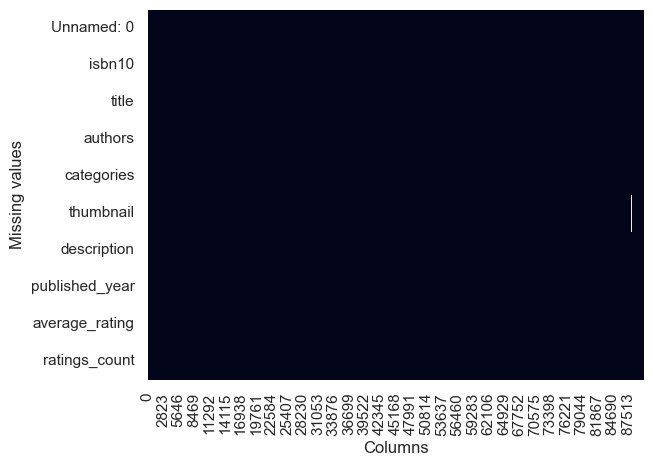

In [30]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [31]:
import numpy as np

books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2025 - books["published_year"]

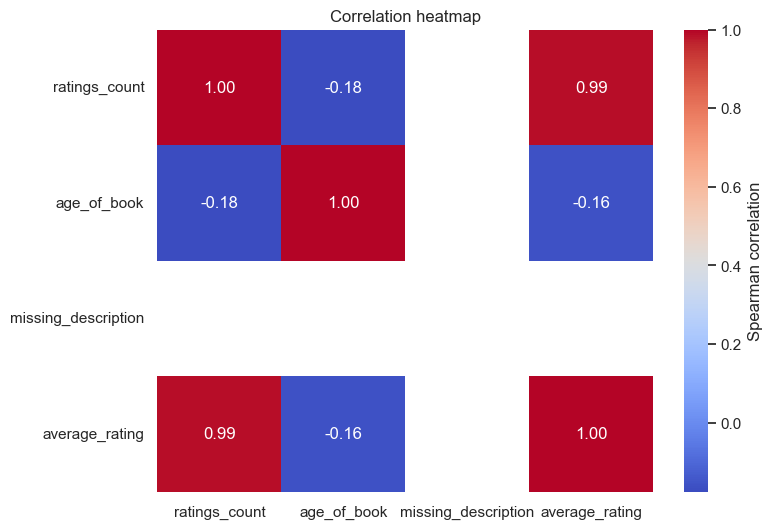

In [32]:
columns_of_interest = ["ratings_count", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

In [33]:
book_missing = books[~(books["description"].isna()) &
      ~(books["ratings_count"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["published_year"].isna())
]

In [34]:
book_missing

,Unnamed: 0,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,ratings_count,missing_description,age_of_book
0,0,0195153448,Classical Mythology,Mark P. O. Morford,Fiction,http://books.google.com/books/content?id=9XzpG...,A chance meeting with an elderly beekeeper tur...,2002,4.00,5,0,23
1,1,0002005018,Clara Callan,Richard Bruce Wright,Fantasy,http://books.google.com/books/content?id=cEI3w...,"During a summer vacation at the beach, thirtee...",2001,0.00,0,0,24
2,2,0060973129,Decision in Normandy,Carlo D'Este,Philosophy,http://books.google.com/books/content?id=hYVW0...,"A modern-day classic. ""Gift from the Sea is li...",1991,4.50,7,0,34
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Fiction,http://books.google.com/books/content?id=xDfxi...,Dimple's parents are from India and she's spen...,1999,3.50,9,0,26
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,Fiction,http://books.google.com/books/content?id=Vp1PE...,“Death is the midnight runner.” – Arab proverb...,1999,0.00,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
90311,90311,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002,3.70,24,0,23
90312,90312,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003,3.82,1568,0,22
90313,90313,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999,4.51,104,0,26
90314,90314,9027712050,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981,0.00,0,0,44


In [35]:
book_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,35284
1,Juvenile Fiction,6887
2,Biography & Autobiography,4316
3,History,2262
4,Juvenile Nonfiction,2217
...,...,...
5280,Sea stories,1
5281,"Theology, Doctrinal",1
5282,Aeneas (Legendary character),1
5283,Yoknapatawpha County (Imaginary place),1


In [36]:
book_missing

,Unnamed: 0,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,ratings_count,missing_description,age_of_book
0,0,0195153448,Classical Mythology,Mark P. O. Morford,Fiction,http://books.google.com/books/content?id=9XzpG...,A chance meeting with an elderly beekeeper tur...,2002,4.00,5,0,23
1,1,0002005018,Clara Callan,Richard Bruce Wright,Fantasy,http://books.google.com/books/content?id=cEI3w...,"During a summer vacation at the beach, thirtee...",2001,0.00,0,0,24
2,2,0060973129,Decision in Normandy,Carlo D'Este,Philosophy,http://books.google.com/books/content?id=hYVW0...,"A modern-day classic. ""Gift from the Sea is li...",1991,4.50,7,0,34
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Fiction,http://books.google.com/books/content?id=xDfxi...,Dimple's parents are from India and she's spen...,1999,3.50,9,0,26
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,Fiction,http://books.google.com/books/content?id=Vp1PE...,“Death is the midnight runner.” – Arab proverb...,1999,0.00,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
90311,90311,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002,3.70,24,0,23
90312,90312,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003,3.82,1568,0,22
90313,90313,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999,4.51,104,0,26
90314,90314,9027712050,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981,0.00,0,0,44


In [37]:
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

In [38]:
book_missing

,Unnamed: 0,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,ratings_count,missing_description,age_of_book,words_in_description
0,0,0195153448,Classical Mythology,Mark P. O. Morford,Fiction,http://books.google.com/books/content?id=9XzpG...,A chance meeting with an elderly beekeeper tur...,2002,4.00,5,0,23,36
1,1,0002005018,Clara Callan,Richard Bruce Wright,Fantasy,http://books.google.com/books/content?id=cEI3w...,"During a summer vacation at the beach, thirtee...",2001,0.00,0,0,24,23
2,2,0060973129,Decision in Normandy,Carlo D'Este,Philosophy,http://books.google.com/books/content?id=hYVW0...,"A modern-day classic. ""Gift from the Sea is li...",1991,4.50,7,0,34,48
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Fiction,http://books.google.com/books/content?id=xDfxi...,Dimple's parents are from India and she's spen...,1999,3.50,9,0,26,37
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,Fiction,http://books.google.com/books/content?id=Vp1PE...,“Death is the midnight runner.” – Arab proverb...,1999,0.00,0,0,26,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90311,90311,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002,3.70,24,0,23,63
90312,90312,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003,3.82,1568,0,22,117
90313,90313,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999,4.51,104,0,26,174
90314,90314,9027712050,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981,0.00,0,0,44,245


In [39]:
book_missing.loc[book_missing["words_in_description"].between(1, 4), "description"]

12           6 Science fiction-romaner.
157               Publisher Description
207              Science fiction-roman.
219                           Thriller.
250        Two complete romance novels.
                      ...              
90041                            Roman.
90106    Translated by Anthony Burgess.
90213                No Marketing Blurb
90238                           Horror.
90303              源氏物語54帖、「宮田切り絵」の真骨頂。
Name: description, Length: 1205, dtype: object

In [40]:
book_missing.loc[book_missing["words_in_description"].between(5, 14), "description"]

18       A brutal murderer is sentenced to death and aw...
26                           The New York Times bestseller
50                         Disney story of 101 Dalmatians.
68                 Combines photos to create new costumes.
122      True story of strange occurrences and sighting...
                               ...                        
90232    The first comprehensive guide to addressing Na...
90242       Presents two complete novels from Henry James.
90271                          Audio Book- unabriged on CD
90289    Raymond Chandler meets The Exorcist. Classic n...
90304    Book Of Five Rings is a Kodansha International...
Name: description, Length: 6709, dtype: object

In [41]:
book_missing.loc[book_missing["words_in_description"].between(15, 24), "description"]

1        During a summer vacation at the beach, thirtee...
6        During a summer vacation at the beach, 13-year...
7        Looks at the shifting ways in which the world ...
8        Two women apply the practice of Zen to the bui...
9        "Mother of Pearl" is a first novel of immense ...
                               ...                        
90280    Everything from the fingerprints of the gods t...
90295    Displays one of America's leading physicist's ...
90296    Basics Illustration 01: Thinking Visually expl...
90298    Provides an introduction to the American artis...
90315    This is a jubilant and rewarding collection of...
Name: description, Length: 17129, dtype: object

In [42]:
book_missing.loc[book_missing["words_in_description"].between(25, 34), "description"]

19       An exotic dance that beguiles and entices... T...
43       When obscure money lender William Weems is fou...
64       Reverend Clare Fergusson teams up with her fri...
65       Der brutale Machtkampf um die Vorherrschaft ei...
67       Presents essays in which the author shares ten...
                               ...                        
90279    Discusses the historical and intellectual back...
90288    Presents nearly one thousand recipes--from app...
90292    Edited by the creator and executive producer o...
90306    Presents the adventures of a new group of hero...
90307    This book is the story of a young girl obsesse...
Name: description, Length: 15106, dtype: object

In [43]:
book_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]

In [44]:
book_missing_25_words

,Unnamed: 0,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,ratings_count,missing_description,age_of_book,words_in_description
0,0,0195153448,Classical Mythology,Mark P. O. Morford,Fiction,http://books.google.com/books/content?id=9XzpG...,A chance meeting with an elderly beekeeper tur...,2002,4.00,5,0,23,36
2,2,0060973129,Decision in Normandy,Carlo D'Este,Philosophy,http://books.google.com/books/content?id=hYVW0...,"A modern-day classic. ""Gift from the Sea is li...",1991,4.50,7,0,34,48
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Fiction,http://books.google.com/books/content?id=xDfxi...,Dimple's parents are from India and she's spen...,1999,3.50,9,0,26,37
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,Fiction,http://books.google.com/books/content?id=Vp1PE...,“Death is the midnight runner.” – Arab proverb...,1999,0.00,0,0,26,84
5,5,0399135782,The Kitchen God's Wife,Amy Tan,Biographers,https://books.google.com/books/content?id=s6IR...,In 1986 two young English scholars stumble upo...,1991,4.00,3,0,34,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90310,90310,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003,2.93,0,0,22,288
90311,90311,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002,3.70,24,0,23,63
90312,90312,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003,3.82,1568,0,22,117
90313,90313,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999,4.51,104,0,26,174


In [45]:
book_missing_25_words["title_and_subtitle"] = (
    np.where(book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"],
             book_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

KeyError: 'subtitle'

In [46]:
book_missing_25_words

,Unnamed: 0,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,ratings_count,missing_description,age_of_book,words_in_description
0,0,0195153448,Classical Mythology,Mark P. O. Morford,Fiction,http://books.google.com/books/content?id=9XzpG...,A chance meeting with an elderly beekeeper tur...,2002,4.00,5,0,23,36
2,2,0060973129,Decision in Normandy,Carlo D'Este,Philosophy,http://books.google.com/books/content?id=hYVW0...,"A modern-day classic. ""Gift from the Sea is li...",1991,4.50,7,0,34,48
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Fiction,http://books.google.com/books/content?id=xDfxi...,Dimple's parents are from India and she's spen...,1999,3.50,9,0,26,37
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,Fiction,http://books.google.com/books/content?id=Vp1PE...,“Death is the midnight runner.” – Arab proverb...,1999,0.00,0,0,26,84
5,5,0399135782,The Kitchen God's Wife,Amy Tan,Biographers,https://books.google.com/books/content?id=s6IR...,In 1986 two young English scholars stumble upo...,1991,4.00,3,0,34,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90310,90310,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003,2.93,0,0,22,288
90311,90311,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002,3.70,24,0,23,63
90312,90312,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003,3.82,1568,0,22,117
90313,90313,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999,4.51,104,0,26,174


In [47]:
book_missing_25_words["tagged_description"] = book_missing_25_words[["isbn10","title","authors", "description"]].astype(str).agg(" ".join, axis=1)

In [48]:
book_missing_25_words

,Unnamed: 0,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,ratings_count,missing_description,age_of_book,words_in_description,tagged_description
0,0,0195153448,Classical Mythology,Mark P. O. Morford,Fiction,http://books.google.com/books/content?id=9XzpG...,A chance meeting with an elderly beekeeper tur...,2002,4.00,5,0,23,36,0195153448 Classical Mythology Mark P. O. Morf...
2,2,0060973129,Decision in Normandy,Carlo D'Este,Philosophy,http://books.google.com/books/content?id=hYVW0...,"A modern-day classic. ""Gift from the Sea is li...",1991,4.50,7,0,34,48,0060973129 Decision in Normandy Carlo D'Este A...
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Fiction,http://books.google.com/books/content?id=xDfxi...,Dimple's parents are from India and she's spen...,1999,3.50,9,0,26,37,0374157065 Flu: The Story of the Great Influen...
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,Fiction,http://books.google.com/books/content?id=Vp1PE...,“Death is the midnight runner.” – Arab proverb...,1999,0.00,0,0,26,84,0393045218 The Mummies of Urumchi E. J. W. Bar...
5,5,0399135782,The Kitchen God's Wife,Amy Tan,Biographers,https://books.google.com/books/content?id=s6IR...,In 1986 two young English scholars stumble upo...,1991,4.00,3,0,34,47,0399135782 The Kitchen God's Wife Amy Tan In 1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90310,90310,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003,2.93,0,0,22,288,8172235224 Mistaken Identity Nayantara Sahgal ...
90311,90311,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002,3.70,24,0,23,63,8173031010 Journey to the East Hermann Hesse T...
90312,90312,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003,3.82,1568,0,22,117,817992162X The Monk Who Sold His Ferrari: A Fa...
90313,90313,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999,4.51,104,0,26,174,8185300534 I Am that Sri Nisargadatta Maharaj;...


In [49]:
(
    book_missing_25_words
    .drop([ "missing_description", "age_of_book", "words_in_description"], axis=1)
    .to_csv("books_cleaned.csv", index = False)
)